In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from utils import decorate, configure_plot_style, AIBM_COLORS

configure_plot_style()

# PIAAC

## OECD PIAAC

From https://www.oecd.org/en/about/programmes/piaac.html

>The Programme for the International Assessment of Adult Competencies (PIAAC) is a programme of assessment and analysis of adult skills. The major product of PIAAC is the Survey of Adult Skills, an international computer-based household survey of adults aged 16-65 years. It is designed as 10-yearly cycles.
>
>The Survey measures adults’ proficiency in key information-processing skills - literacy, numeracy and problem solving – which represent skills needed for individuals to participate in society and for economies to prosper. It also gathers information and data on how adults use their skills at home and at work.
>
>The 1st Cycle of the Survey of Adult Skills was conducted over three separate rounds between 2011 and 2018 in 39 countries. During the 1st Cycle, about 245 000 adults were interviewed, representing 1.15 billion people.
>
>The 2nd Cycle of the Survey of Adults Skills has been conducted in 31 countries and economies so far. A first round of data collection took place in 2022-2023 with results released on 10 December 2024.  




I downloaded two tables from https://www.oecd.org/en/publications/do-adults-have-the-skills-they-need-to-thrive-in-a-changing-world_b263dc5d-en/full-report/tables-of-results-for-countries-and-economies_0432d7e4.html#annex-d1e19379-dc605a08b8:

* Table A.2.7 (L): Literacy proficiency, by gender

* Table A.2.8 (L): Literacy proficiency, by gender and age group

Both are sheets in this Excel spreadsheet: https://stat.link/eb8dxq

The first table includes "Percentage of low performers (scoring at Level 1 or below)", which we will use as a replacement for illiteracy.

Here's the description of Level 1:

> Adults at Level 1 are able to locate information on a text page, find a relevant link from a website, and identify relevant text among multiple options when the relevant information is explicitly cued. They can understand the meaning of short texts, as well as the organization of lists or multiple sections within a single page.
>
>The texts at level 1 may be continuous, noncontinuous, or mixed and pertain to printed or digital environments. They typically include a single page with up to a few hundred words and little or no distracting information. Noncontinuous texts may have a list structure (such as a web search engine results page) or include a small number of independent sections, possibly with pictorial illustrations or simple diagrams. Tasks at Level 1 involve simple questions providing some guidance as to what needs to be done and a single processing step. There is a direct, fairly obvious match between the question and target information in the text, although some tasks may require the examination of more than one piece of information.

We'll flip the sense by computing:

`literacy rate = (100 - Percentage of low performers)`

Here's the data.


In [51]:
piaac = pd.read_excel('eb8dxq.xlsx', sheet_name='A.2.7 (L)', skiprows=6, skipfooter=11)

piaac.columns = ['country', 'mean', 'se', 
           'male_mean', 'male_mean_se', 'female_mean', 'female_mean_se',
           'diff', 'diff_se', 
           'unused', 'unused', 'unused', 'unused', 
           'male_percent', 'male_percent_se', 'female_percent', 'female_percent_se', 
           'unused', 'unused']
piaac['country'] = piaac['country'].replace('Poland*', 'Poland')
piaac.head()

,country,mean,se,male_mean,male_mean_se,female_mean,female_mean_se,diff,diff_se,unused,unused,unused,unused,male_percent,male_percent_se,female_percent,female_percent_se,unused,unused
0,Austria,254.369808,0.880442,254.309342,1.451380,254.430673,1.187266,-0.121331,1.983984,0.951235,-2.799169,1.736435,0.106957,29.282004,1.231198,28.620819,1.125002,0.661185,1.777549
1,Canada,270.770314,0.870268,271.017313,1.437290,270.522105,1.139001,0.495207,1.923685,0.796850,0.638806,1.614895,0.692421,19.670112,1.145555,18.873108,0.983209,0.797005,1.585128
2,Chile,217.889950,2.153137,217.680876,3.046819,218.099045,1.813228,-0.418169,2.568732,0.870682,0.458546,1.766441,0.795182,53.238281,2.393751,53.549892,1.859101,-0.311611,2.405293
3,Czechia,260.205637,0.982685,259.479752,1.676722,260.958352,1.230915,-1.478599,2.199785,0.501484,0.795314,1.835662,0.664828,26.072850,1.385492,23.422168,1.051619,2.650682,1.936533
4,Denmark,273.033693,0.811874,271.499922,1.404251,274.600515,1.177973,-3.100594,2.023761,0.125499,1.055020,1.518884,0.487304,19.805036,1.053472,15.903784,0.809196,3.901252,1.441933


In [52]:
piaac_country_to_code = {
    'Austria': 'AUT',
    'Canada': 'CAN',
    'Chile': 'CHL',
    'Czechia': 'CZE',
    'Denmark': 'DNK',
    'Estonia': 'EST',
    'Finland': 'FIN',
    'France': 'FRA',
    'Germany': 'DEU',
    'Hungary': 'HUN',
    'Ireland': 'IRL',
    'Israel': 'ISR',
    'Italy': 'ITA',
    'Japan': 'JPN',
    'Korea': 'KOR',
    'Latvia': 'LVA',
    'Lithuania': 'LTU',
    'Netherlands': 'NLD',
    'New Zealand': 'NZL',
    'Norway': 'NOR',
    'Poland': 'POL',
    'Portugal': 'PRT',
    'Slovak Republic': 'SVK',
    'Spain': 'ESP',
    'Sweden': 'SWE',
    'Switzerland': 'CHE',
    'United States': 'USA'
}



In [53]:
piaac.index = piaac['country'].map(piaac_country_to_code)
piaac.index.name = 'code'
piaac.head()

,country,mean,se,male_mean,male_mean_se,female_mean,female_mean_se,diff,diff_se,unused,unused,unused,unused,male_percent,male_percent_se,female_percent,female_percent_se,unused,unused
code,,,,,,,,,,,,,,,,,,,
AUT,Austria,254.369808,0.880442,254.309342,1.451380,254.430673,1.187266,-0.121331,1.983984,0.951235,-2.799169,1.736435,0.106957,29.282004,1.231198,28.620819,1.125002,0.661185,1.777549
CAN,Canada,270.770314,0.870268,271.017313,1.437290,270.522105,1.139001,0.495207,1.923685,0.796850,0.638806,1.614895,0.692421,19.670112,1.145555,18.873108,0.983209,0.797005,1.585128
CHL,Chile,217.889950,2.153137,217.680876,3.046819,218.099045,1.813228,-0.418169,2.568732,0.870682,0.458546,1.766441,0.795182,53.238281,2.393751,53.549892,1.859101,-0.311611,2.405293
CZE,Czechia,260.205637,0.982685,259.479752,1.676722,260.958352,1.230915,-1.478599,2.199785,0.501484,0.795314,1.835662,0.664828,26.072850,1.385492,23.422168,1.051619,2.650682,1.936533
DNK,Denmark,273.033693,0.811874,271.499922,1.404251,274.600515,1.177973,-3.100594,2.023761,0.125499,1.055020,1.518884,0.487304,19.805036,1.053472,15.903784,0.809196,3.901252,1.441933


Here's the ratio intended to be comparable to the WEF equity scores, except that it's symmetric.

In [54]:
piaac['ratio'] = (100 - piaac['female_percent']) / (100 - piaac['male_percent'])
piaac['ratio'].describe()

count    27.000000
mean      1.041883
std       0.032982
min       0.973661
25%       1.018114
50%       1.045394
75%       1.062122
max       1.099257
Name: ratio, dtype: float64

In [55]:
piaac['score'] = 1 - np.abs(piaac['ratio'] - 1)
piaac['score'].describe()

count    27.000000
mean      0.955317
std       0.028915
min       0.900743
25%       0.937878
50%       0.954606
75%       0.977354
max       0.995735
Name: score, dtype: float64

In [56]:
piaac['score_truncated'] = np.where(piaac['ratio'] > 1, 1, piaac['score'])
piaac['score_truncated'].describe()

count    27.000000
mean      0.998600
std       0.005219
min       0.973661
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: score_truncated, dtype: float64

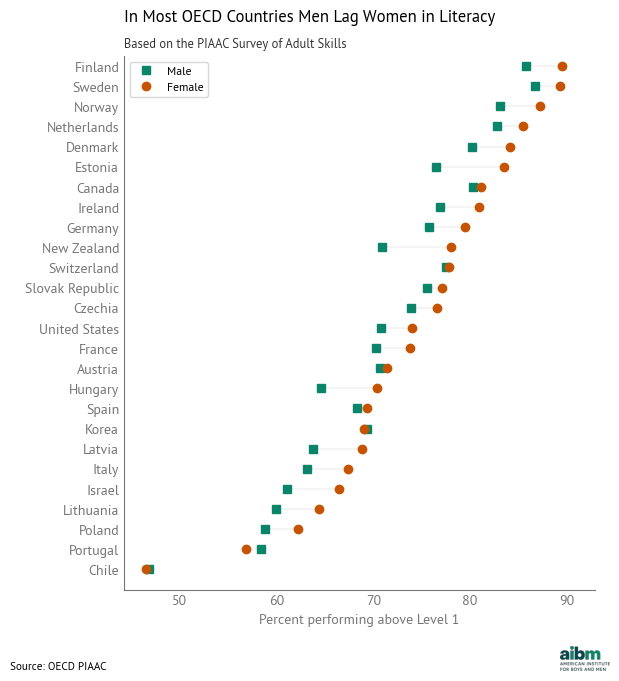

In [57]:
from utils import add_title, add_subtext, add_logo

piaac_sorted = piaac.sort_values(by='female_percent')
country = piaac_sorted['country']
male = 100 - piaac_sorted['male_percent']
female = 100 - piaac_sorted['female_percent']

fig, ax = plt.subplots(figsize=(6, 6))
plt.hlines(country, male, female, color=AIBM_COLORS['light_gray'])
plt.plot(male, country, 's', color=AIBM_COLORS['green'], label='Male')
plt.plot(female, country, 'o', color=AIBM_COLORS['orange'], label='Female')
ax.invert_yaxis()

decorate(xlabel='Percent performing above Level 1', ylim=[len(piaac), 0.5])
add_title("In Most OECD Countries Men Lag Women in Literacy",
          "Based on the PIAAC Survey of Adult Skills", y=1.01)
add_subtext("Source: OECD PIAAC", y=-0.05)
logo = add_logo(location=(1.0, -0.05))

### PIACC by age and gender

The percentages in the previous table include all adults, so they are comparable to WEF literacy percentages in that sense.
But adult literacy is a long-lagging indicator of equity in primary and secondary education. To get a sense of generational shifts, we can split the PIAAC data by age group, this time using average scores rather than percentages above or below Level 1. 

In [58]:
piaac2 = pd.read_excel('eb8dxq.xlsx', sheet_name='A.2.8 (L)', skiprows=7, skipfooter=11)
piaac2.columns = ['country', 'mean', 'se', 
              'male_1624', 'unused', 
              'male_2544', 'unused',
              'male_4565', 'unused', 
              'female_1624', 'unused', 
              'female_2544', 'unused', 
              'female_4565', 'unused']
piaac2.index = piaac2['country'].map(piaac_country_to_code)
piaac2.index.name = 'code'
piaac2.head()

,country,mean,se,male_1624,unused,male_2544,unused,male_4565,unused,female_1624,unused,female_2544,unused,female_4565,unused
code,,,,,,,,,,,,,,,
AUT,Austria,254.369808,0.880442,279.179917,2.721358,261.476261,2.594828,239.380111,1.889976,276.681586,3.063416,265.207110,2.107964,238.292591,1.807221
CAN,Canada,270.770314,0.870268,278.700704,2.348791,281.900724,1.949657,256.498186,2.480429,276.572240,3.054475,278.793410,1.730578,259.996480,2.032522
CHL,Chile,217.889950,2.153137,242.490303,4.912394,229.503450,3.220636,190.168849,4.052734,241.228244,3.007821,227.847798,3.035500,196.490344,2.187538
CZE,Czechia,260.205637,0.982685,272.128212,4.189601,265.056140,2.563875,250.312403,2.259828,275.430585,3.341694,267.562318,2.123062,250.652914,1.829991
DNK,Denmark,273.033693,0.811874,274.417365,2.773272,281.432495,2.431197,261.018753,2.079349,278.917584,3.284424,282.042509,1.876543,266.266997,1.572869


In [59]:
diff_1624 = piaac2['female_1624'] - piaac2['male_1624']
diff_2544 = piaac2['female_2544'] - piaac2['male_2544']
diff_4565 = piaac2['female_4565'] - piaac2['male_4565']


In [60]:

diffs = pd.DataFrame(dict(
    country=piaac2['country'],
    diff_1624=diff_1624,
    diff_2544=diff_2544,
    diff_4565=diff_4565))
diffs.head()

,country,diff_1624,diff_2544,diff_4565
code,,,,
AUT,Austria,-2.498331,3.730849,-1.087520
CAN,Canada,-2.128464,-3.107314,3.498294
CHL,Chile,-1.262058,-1.655652,6.321495
CZE,Czechia,3.302373,2.506179,0.340511
DNK,Denmark,4.500219,0.610014,5.248244


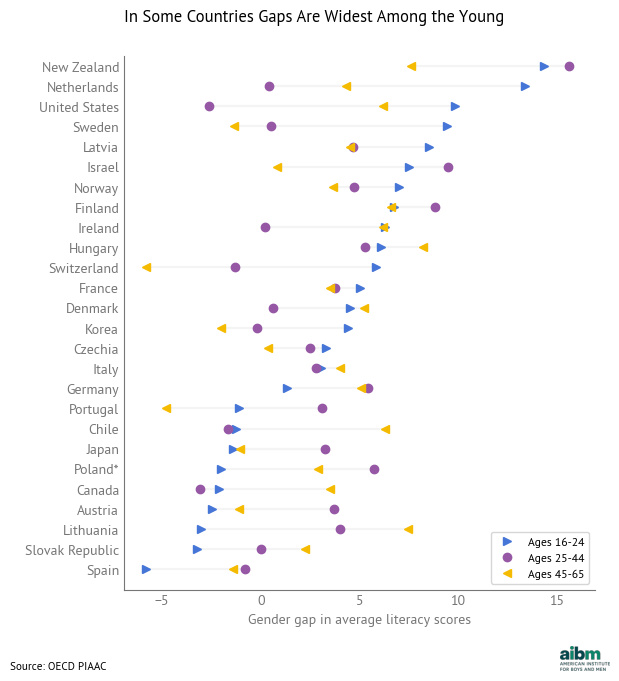

In [61]:
from utils import add_title, add_subtext, add_logo

diffs_sorted = diffs.sort_values(by='diff_1624', ascending=False)
country = diffs_sorted['country']
young = diffs_sorted['diff_1624']
middle = diffs_sorted['diff_2544']
old = diffs_sorted['diff_4565']

fig, ax = plt.subplots(figsize=(6, 6))
plt.hlines(country, young, middle, color=AIBM_COLORS['light_gray'])
plt.hlines(country, old, middle, color=AIBM_COLORS['light_gray'])

plt.plot(young, country, '>', 
         color=AIBM_COLORS['blue'], label='Ages 16-24')
plt.plot(middle, country, 'o', 
         color=AIBM_COLORS['purple'], label='Ages 25-44')
plt.plot(old, country, '<', 
         color=AIBM_COLORS['amber'], label='Ages 45-65')
ax.invert_yaxis()

decorate(xlabel='Gender gap in average literacy scores', ylim=[len(piaac2), 0.5])
add_title("In Some Countries Gaps Are Widest Among the Young",
          "", y=1.01)
add_subtext("Source: OECD PIAAC", y=-0.05)
logo = add_logo(location=(1.0, -0.05))

In some countries the gender gap is widest among young people.
In these countries, the use of a lagging indicator might understate the degree of inequality.

Not to make too much of this point -- it is probably a reasonable thing to include in the index one measure that is an aggregation of the entire population, along with snapshots of current education.